In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📄 Metadata Dataset: `pl_defense.csv`
| STT | Display column name | `data-stat` (raw)             | Standardized column name   | Short description                                |
| --- | ------------------- | ----------------------------- | -------------------------- | ------------------------------------------------ |
| 1   | Squad               | `Unnamed: 0_level_0_Squad`    | team                       | Team name                                         |
| 2   | # Pl                | `Unnamed: 1_level_0_# Pl`     | players_used               | Number of players used                            |
| 3   | 90s                 | `Unnamed: 2_level_0_90s`      | minutes_90s                | Total minutes played (converted to 90s)           |
| 4   | Tkl                 | `Tackles_Tkl`                 | tackles                    | Total tackles                                     |
| 5   | TklW                | `Tackles_TklW`                | tackles_won                | Successful tackles                                |
| 6   | Def 3rd             | `Tackles_Def_3rd`             | tackles_defensive_third    | Tackles in the defensive third                    |
| 7   | Mid 3rd             | `Tackles_Mid_3rd`             | tackles_middle_third       | Tackles in the middle third                       |
| 8   | Att 3rd             | `Tackles_Att_3rd`             | tackles_attacking_third    | Tackles in the attacking third                    |
| 9   | Tkl (Challenges)    | `Challenges_Tkl`              | dribblers_tackled          | Dribblers tackled                                 |
| 10  | Att                 | `Challenges_Att`              | dribble_challenges         | Total dribble challenges                          |
| 11  | Tkl%                | `Challenges_Tkl%`             | dribblers_tackled_pct      | Tackle success rate in dribble challenges          |
| 12  | Lost                | `Challenges_Lost`             | dribble_challenges_lost    | Dribble challenges lost                            |
| 13  | Blocks              | `Blocks_Blocks`               | blocks                     | Total blocks                                      |
| 14  | Sh                  | `Blocks_Sh`                   | blocked_shots              | Shots blocked                                     |
| 15  | Pass                | `Blocks_Pass`                 | blocked_passes             | Passes blocked                                    |
| 16  | Int                 | `Unnamed: 15_level_0_Int`     | interceptions              | Interceptions                                     |
| 17  | Tkl+Int             | `Unnamed: 16_level_0_Tkl+Int` | tackles_plus_interceptions | Total tackles + interceptions                      |
| 18  | Clr                 | `Unnamed: 17_level_0_Clr`     | clearances                 | Clearances                                        |
| 19  | Err                 | `Unnamed: 18_level_0_Err`     | errors_leading_to_shot     | Errors leading to an opponent shot                 |
| 20  | Season              | `Season`                      | Season                     | Season                                            |
| 21  | Stat Type           | `StatType`                    | Stattype                   | Stat type (defense)                               |

#File backup

In [ ]:
df_defense = df.copy()

#Checking data structures

In [ ]:
df.head()

,team,players_used,minutes_90s,tackles,tackles_won,tackles_defensive_third,tackles_middle_third,tackles_attacking_third,dribblers_tackled,dribble_challenges,...,dribble_challenges_lost,blocks,blocked_shots,blocked_passes,interceptions,tackles_plus_interceptions,clearances,errors_leading_to_shot,Season,StatType
0,Arsenal,24,16.0,251,144,103,102,46,108,195,...,87,148,41,107,109,360,373,7,2025-2026,defense
1,Aston Villa,23,16.0,257,156,120,110,27,128,244,...,116,166,65,101,93,350,372,14,2025-2026,defense
2,Bournemouth,24,15.0,262,149,117,101,44,135,249,...,114,172,41,131,133,395,465,6,2025-2026,defense
3,Brentford,21,16.0,260,155,108,111,41,119,219,...,100,187,64,123,133,393,506,8,2025-2026,defense
4,Brighton,25,16.0,307,188,123,125,59,154,325,...,171,163,42,121,123,430,368,9,2025-2026,defense


In [ ]:
df.shape

(60, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team                        60 non-null     object 
 1   players_used                60 non-null     int64  
 2   minutes_90s                 60 non-null     float64
 3   tackles                     60 non-null     int64  
 4   tackles_won                 60 non-null     int64  
 5   tackles_defensive_third     60 non-null     int64  
 6   tackles_middle_third        60 non-null     int64  
 7   tackles_attacking_third     60 non-null     int64  
 8   dribblers_tackled           60 non-null     int64  
 9   dribble_challenges          60 non-null     int64  
 10  dribblers_tackled_pct       60 non-null     float64
 11  dribble_challenges_lost     60 non-null     int64  
 12  blocks                      60 non-null     int64  
 13  blocked_shots               60 non-nu

In [ ]:
df.describe()

,players_used,minutes_90s,tackles,tackles_won,tackles_defensive_third,tackles_middle_third,tackles_attacking_third,dribblers_tackled,dribble_challenges,dribblers_tackled_pct,dribble_challenges_lost,blocks,blocked_shots,blocked_passes,interceptions,tackles_plus_interceptions,clearances,errors_leading_to_shot
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,27.033333,30.633333,535.666667,317.633333,253.083333,205.416667,77.166667,250.700000,494.50000,51.501667,243.80000,349.183333,114.083333,235.100000,248.016667,783.683333,712.633333,20.316667
std,3.817740,10.507409,200.622055,118.858122,104.496418,75.770459,30.784195,92.252472,192.38948,3.838189,102.88908,136.531302,51.844059,90.828522,92.926888,290.941050,237.567258,10.428923
min,19.000000,15.000000,214.000000,128.000000,91.000000,81.000000,22.000000,100.000000,178.00000,44.300000,78.00000,141.000000,39.000000,94.000000,93.000000,324.000000,361.000000,6.000000
25%,24.000000,16.000000,290.750000,176.250000,137.500000,111.750000,44.000000,145.750000,257.50000,48.500000,120.75000,184.500000,64.750000,125.250000,139.750000,429.500000,492.750000,13.000000
50%,26.500000,38.000000,635.000000,371.000000,283.500000,238.000000,82.500000,289.500000,584.00000,51.250000,282.50000,401.500000,113.000000,270.000000,285.000000,910.000000,715.500000,18.000000
75%,30.000000,38.000000,685.750000,411.750000,334.250000,260.250000,102.000000,324.250000,656.00000,54.225000,323.00000,462.750000,157.500000,308.500000,323.500000,1027.750000,908.000000,25.250000
max,36.000000,38.000000,817.000000,493.000000,437.000000,305.000000,129.000000,400.000000,768.00000,60.400000,427.00000,534.000000,207.000000,367.000000,378.000000,1175.000000,1220.000000,51.000000


In [ ]:
df.dtypes

,0
team,object
players_used,int64
minutes_90s,float64
tackles,int64
tackles_won,int64
tackles_defensive_third,int64
tackles_middle_third,int64
tackles_attacking_third,int64
dribblers_tackled,int64
dribble_challenges,int64


In [ ]:
df.isna().sum()

,0
team,0
players_used,0
minutes_90s,0
tackles,0
tackles_won,0
tackles_defensive_third,0
tackles_middle_third,0
tackles_attacking_third,0
dribblers_tackled,0
dribble_challenges,0


In [ ]:
df_defense.duplicated().sum()

np.int64(0)

In [ ]:
numeric_cols = df_defense.select_dtypes(include="number").columns

(df_defense[numeric_cols] < 0).sum()

,0
players_used,0
minutes_90s,0
tackles,0
tackles_won,0
tackles_defensive_third,0
tackles_middle_third,0
tackles_attacking_third,0
dribblers_tackled,0
dribble_challenges,0
dribblers_tackled_pct,0


Basic data quality checks show that the dataset contains no duplicate records, has no implausible negative values, and that rate-based variables fall within valid ranges. Therefore, the data meets the requirements for descriptive analysis and for building subsequent composite indicators.


In [ ]:
df_defense = df_defense.rename(columns={
    "Season": "season",
    "StatType": "stattype"
})

# Univariate analysis


In [ ]:
## check & sort season order
df_defense["season"] = df_defense["season"].astype("category")
df_defense["season"] = df_defense["season"].cat.set_categories(
    ["2023-2024", "2024-2025", "2025-2026"],
    ordered=True
)

df_defense["season"].value_counts().sort_index()


,count
season,
2023-2024,20
2024-2025,20
2025-2026,20


In [ ]:
num_cols = [
    "tackles",
    "tackles_won",
    "tackles_defensive_third",
    "tackles_middle_third",
    "tackles_attacking_third",
    "interceptions",
    "tackles_plus_interceptions",
    "dribble_challenges",
    "dribblers_tackled",
    "dribble_challenges_lost",
    "dribblers_tackled_pct",
]


Mean, median, min, max for each season based on the following metrics:
- tackles_plus_interceptions,
- distribution by zone (tackles_defensive_third, tackles_attacking_third), dribblers_tackled_pct,
- dribble_challenges


- **tackles_plus_interceptions**: Represents overall defensive intensity by combining the two most important proactive defensive actions (tackles and interceptions), reflecting a team’s overall level of defensive involvement.

- **tackles_defensive_third**: Captures defensive activity in the defensive third, indicating the extent of deeper/low-block defending and the ability to protect areas close to goal.

- **tackles_attacking_third**: Reflects the number of tackles in the attacking third, representing high-pressing ability and the tactical approach of applying pressure high up the pitch.

- **dribblers_tackled_pct**: Measures defensive effectiveness in 1v1 situations, reflecting defensive quality rather than merely the volume of challenges.

- **dribble_challenges**: Indicates the volume of dribble-challenge situations, providing context for efficiency metrics and reflecting how frequently a team faces opponent dribbling actions.


In [ ]:
features = [
    "tackles_plus_interceptions",
    "tackles_defensive_third",
    "tackles_attacking_third",
    "dribblers_tackled_pct",
    "dribble_challenges"
]

In [ ]:
count_feats = [
    "tackles_plus_interceptions",
    "tackles_defensive_third",
    "tackles_attacking_third",
    "dribble_challenges"
]

for c in count_feats:
    df[f"{c}_per90"] = df[c] / df["minutes_90s"]


In [ ]:
features_per90 = [
    "tackles_plus_interceptions_per90",
    "tackles_defensive_third_per90",
    "tackles_attacking_third_per90",
    "dribble_challenges_per90",
    "dribblers_tackled_pct"
]


In [ ]:
season_summary = (
    df.groupby("Season")[features_per90]
      .agg(["mean", "median", "min", "max"])
      .round(3)
)
season_summary


tackles_plus_interceptions_per90                          \
                                      mean  median     min     max   
Season                                                               
2023-2024                           25.958  26.474  19.737  29.237   
2024-2025                           25.533  25.842  19.105  30.921   
2025-2026                           24.812  25.231  20.250  29.062   

          tackles_defensive_third_per90                        \
                                   mean median    min     max   
Season                                                          
2023-2024                         8.562  8.737  4.816  11.500   
2024-2025                         8.154  7.724  4.816  10.842   
2025-2026                         7.801  7.744  5.688  10.375   

          tackles_attacking_third_per90                       \
                                   mean median    min    max   
Season                                                         
2023-2024                         2.496  2.513  1.789  3.289   
2024-2025                         2.567  2.526  1.763  3.395   
2025-2026                         2.462  2.406  1.375  3.875   

          dribble_challenges_per90                          \
                              mean  median     min     max   
Season                                                       
2023-2024                   16.743  16.645  12.053  20.211   
2024-2025                   16.014  15.895  11.816  19.026   
2025-2026                   15.020  14.906  11.125  20.312   

          dribblers_tackled_pct                     
                           mean median   min   max  
Season                                              
2023-2024                49.075  48.70  44.3  55.3  
2024-2025                51.050  50.80  46.5  56.8  
2025-2026                54.380  54.25  45.5  60.4

- **Season 2023–2024**: Defensive intensity per 90 is high, with a larger median for tackles_plus_interceptions_per90 and dribble_challenges_per90, indicating that teams frequently engage in defensive actions and face many contest situations. The defensive distribution by zone is relatively balanced, while 1v1 effectiveness (dribblers_tackled_pct) sits around the mid-range across the three seasons.

- **Season 2024–2025**: Overall defensive per-90 levels remain broadly stable compared with the previous season, with only minor changes in the medians of intensity metrics and zone-based distribution. Notably, dribblers_tackled_pct increases slightly, suggesting improved 1v1 defensive effectiveness even as the volume of challenges per 90 tends to decrease.

- **Season 2025–2026**: Defensive intensity per 90 decreases slightly relative to the prior two seasons, reflected by lower medians for tackles_plus_interceptions_per90 and dribble_challenges_per90. In contrast, 1v1 effectiveness reaches its highest level, with a clear rise in the median dribblers_tackled_pct, indicating that teams defend less in volume but are more effective in individual duels.


##Detailed analysis of **tackles_plus_interceptions_per90**

→ This metric is chosen because it is one of the most comprehensive composite measures of a team’s proactive defensive intensity.

> **TPI** combines both tackles and interceptions, offering a holistic view of how actively a team participates in defensive actions throughout a match. Moreover, TPI is less tied to any single defensive zone on the pitch, allowing it to capture an overall defensive style rather than localized tactical behavior. This makes it particularly well-suited for assessing league-wide defensive baselines and tracking how defensive dispersion (the degree of variation between teams) evolves over time.


In [ ]:
df_defense["tpi_per90"] = (
    df_defense["tackles_plus_interceptions"]
    / df_defense["minutes_90s"]
)


In [ ]:
summary = (
    df_defense
    .groupby("season")["tpi_per90"]
    .agg(
        median="median",
        q1=lambda x: x.quantile(0.25),
        q3=lambda x: x.quantile(0.75)
    )
)

summary["iqr"] = summary["q3"] - summary["q1"]
summary


,median,q1,q3,iqr
season,,,,
2023-2024,26.473684,24.802632,27.776316,2.973684
2024-2025,25.842105,23.375000,27.506579,4.131579
2025-2026,25.231250,22.593750,26.781250,4.187500


- **Season 2023–2024**: The median tackles_plus_interceptions_per90 is the highest across the three seasons, indicating the strongest “typical” level of defensive intensity. A relatively small IQR suggests that most teams are fairly similar in their defensive involvement, with limited gaps between teams.

- **Season 2024–2025**: The median decreases slightly compared with the previous season, suggesting a mild downward shift in the overall defensive-intensity baseline per 90. The IQR increases noticeably, pointing to greater separation across teams—some teams display markedly higher defensive intensity than the league average.

- **Season 2025–2026**: The median declines a bit further, while the IQR remains elevated, indicating that between-team differences are still substantial. This implies that although the typical defensive intensity does not drop sharply, defensive disparity across teams persists.


<Figure size 600x400 with 0 Axes>

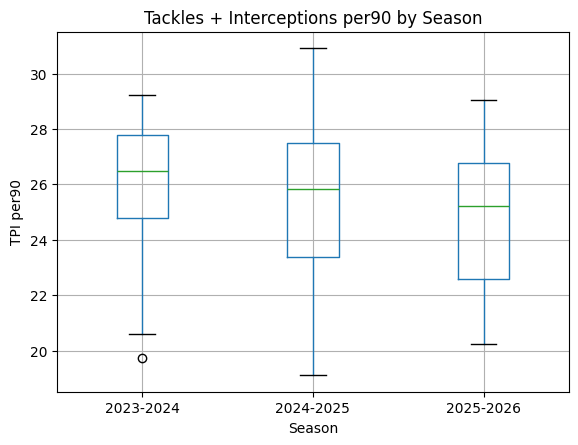

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df_defense.boxplot(
    column="tpi_per90",
    by="season"
)
plt.title("Tackles + Interceptions per90 by Season")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("TPI per90")
plt.show()


* **Season 2023–2024**: The median is the highest among the three seasons, indicating strong typical defensive intensity. A moderately sized IQR suggests noticeable differences but not extreme polarization; however, the presence of a low outlier indicates at least one team defending well below the league baseline.

* **Season 2024–2025**: The median decreases slightly from the prior season, while the IQR widens, pointing to clearer stratification in defensive intensity. This suggests the coexistence of both very strong defensive teams and notably weaker ones within the league.

* **Season 2025–2026**: The median declines again, and the IQR remains relatively large, implying a lower typical defensive baseline while meaningful between-team gaps still persist.


##Detailed analysis of **tackles_attacking_third_per90**

This metric captures proactive defensive activity in the opponent’s third, making it a strong proxy for a team’s high-pressing approach. Unlike broad defensive totals, tackles in the attacking third reflect a team’s ability to apply early pressure and disrupt the opponent’s build-up play before they can progress the ball. Normalizing per 90 minutes ensures fair comparisons across teams and across seasons with different match totals, while emphasizing differences in defensive style rather than simply overall defensive volume.


In [ ]:
df_defense["tackles_attacking_third_per90"] = (
    df_defense["tackles_attacking_third"]
    / df_defense["minutes_90s"]
)


In [ ]:
summary_att_third = (
    df_defense
    .groupby("season")["tackles_attacking_third_per90"]
    .agg(
        median="median",
        q1=lambda x: x.quantile(0.25),
        q3=lambda x: x.quantile(0.75)
    )
)

summary_att_third["iqr"] = summary_att_third["q3"] - summary_att_third["q1"]
summary_att_third


,median,q1,q3,iqr
season,,,,
2023-2024,2.513158,2.092105,2.921053,0.828947
2024-2025,2.526316,2.309211,2.743421,0.434211
2025-2026,2.406250,1.968750,2.868750,0.900000


- **Season 2023–2024**: A relatively high median suggests that teams generally maintain a solid level of high-pressing intensity, while a fairly large IQR indicates clear stylistic differences—some teams press much more aggressively than the rest.

- **Season 2024–2025**: The median remains nearly unchanged from the previous season, but the IQR narrows noticeably, implying that high-pressing intensity becomes more uniform across teams, with less pronounced tactical polarization in proactive defending.

- **Season 2025–2026**: The median dips slightly relative to the prior two seasons, while the IQR widens again. This points to a somewhat lower overall high-pressing baseline, but greater between-team variation, suggesting more diversity in defensive approaches.


<Figure size 600x400 with 0 Axes>

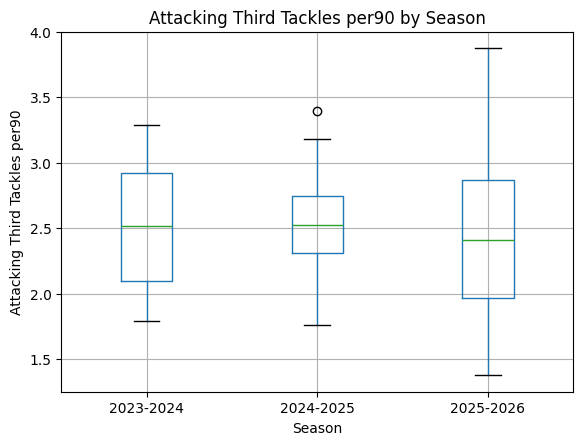

In [ ]:
plt.figure(figsize=(6, 4))
df_defense.boxplot(
    column="tackles_attacking_third_per90",
    by="season"
)
plt.title("Attacking Third Tackles per90 by Season")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("Attacking Third Tackles per90")
plt.show()


* **Season 2023–2024**: The median is high, indicating that many teams employ a fairly aggressive high press. A relatively large IQR reflects stylistic diversity, with some teams pressing significantly more intensely than others.

* **Season 2024–2025**: The median is almost unchanged from the previous season, but the IQR narrows substantially, suggesting that teams’ high-pressing intensity becomes more uniform and there is less tactical polarization in proactive defending.

* **Season 2025–2026**: The median decreases slightly while the IQR widens again, implying a lower typical level of high pressing, but clearer differences between teams—signaling a return of diversity in defensive approaches.


## Detailed analysis of dribble_challenges_per90:

The dribble_challenges_per90 metric measures how frequently a team faces 1v1 dribble-challenge situations per 90 minutes. This variable provides important context for defensive effectiveness by capturing how often opponents attempt to exploit a team through dribbling actions. When analyzed alongside efficiency metrics such as dribblers_tackled_pct, it helps clearly distinguish between teams that are frequently forced into 1v1 defending and teams that are simply more effective within those situations.


In [ ]:
df_defense["dribble_challenges_per90"] = (
    df_defense["dribble_challenges"]
    / df_defense["minutes_90s"]
)


In [ ]:
summary_dribble = (
    df_defense
    .groupby("season")["dribble_challenges_per90"]
    .agg(
        median="median",
        q1=lambda x: x.quantile(0.25),
        q3=lambda x: x.quantile(0.75)
    )
)

summary_dribble["iqr"] = summary_dribble["q3"] - summary_dribble["q1"]
summary_dribble


,median,q1,q3,iqr
season,,,,
2023-2024,16.644737,15.973684,18.125000,2.151316
2024-2025,15.894737,14.743421,17.348684,2.605263
2025-2026,14.906250,13.640625,16.337500,2.696875


* **Season 2023–2024**: The median *dribble_challenges_per90* is the highest across the three seasons, indicating that teams generally face more 1v1 dribble-challenge situations. A relatively small IQR suggests limited between-team variation, meaning the frequency of 1v1 duels is fairly consistent across the league.

* **Season 2024–2025**: The median decreases slightly compared with the previous season, implying a mild decline in the typical number of 1v1 dribble challenges. However, the IQR increases noticeably, pointing to greater stratification—some teams still face many dribbling situations while others face significantly fewer.

* **Season 2025–2026**: The median continues to decline, indicating a lower overall baseline for 1v1 challenge frequency. At the same time, the IQR reaches its highest level, showing that between-team differences become increasingly pronounced. This suggests that attacking styles and teams’ ability to control opponents’ dribbling threats are becoming more diverse across the league.


<Figure size 600x400 with 0 Axes>

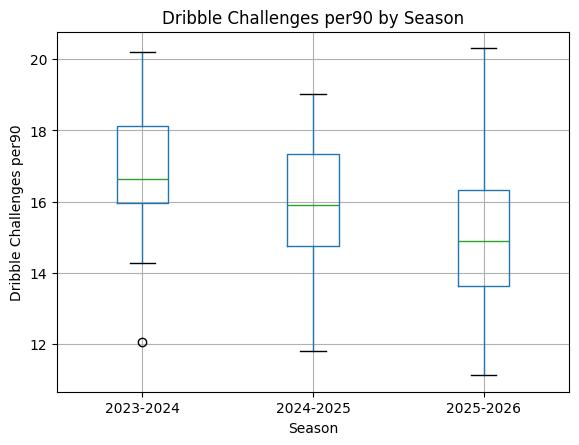

In [ ]:
plt.figure(figsize=(6, 4))
df_defense.boxplot(
    column="dribble_challenges_per90",
    by="season"
)
plt.title("Dribble Challenges per90 by Season")
plt.suptitle("")
plt.xlabel("Season")
plt.ylabel("Dribble Challenges per90")
plt.show()


* **Season 2023–2024**: The median is the highest of the three seasons, indicating that teams frequently face a larger volume of 1v1 dribble-challenge situations. The IQR is moderate, but a low outlier appears—suggesting that some teams control opponents well and successfully limit their dribbling opportunities.

* **Season 2024–2025**: The median declines slightly from the prior season, and the IQR increases, pointing to clearer stratification in how often teams are drawn into 1v1 duels. Some teams face substantially more dribbling situations than others.

* **Season 2025–2026**: The median continues to fall, while the IQR remains large and a high outlier emerges. This indicates a lower overall league baseline for 1v1 challenges, but also that certain teams are still heavily targeted and exploited by opponents through dribbling actions.


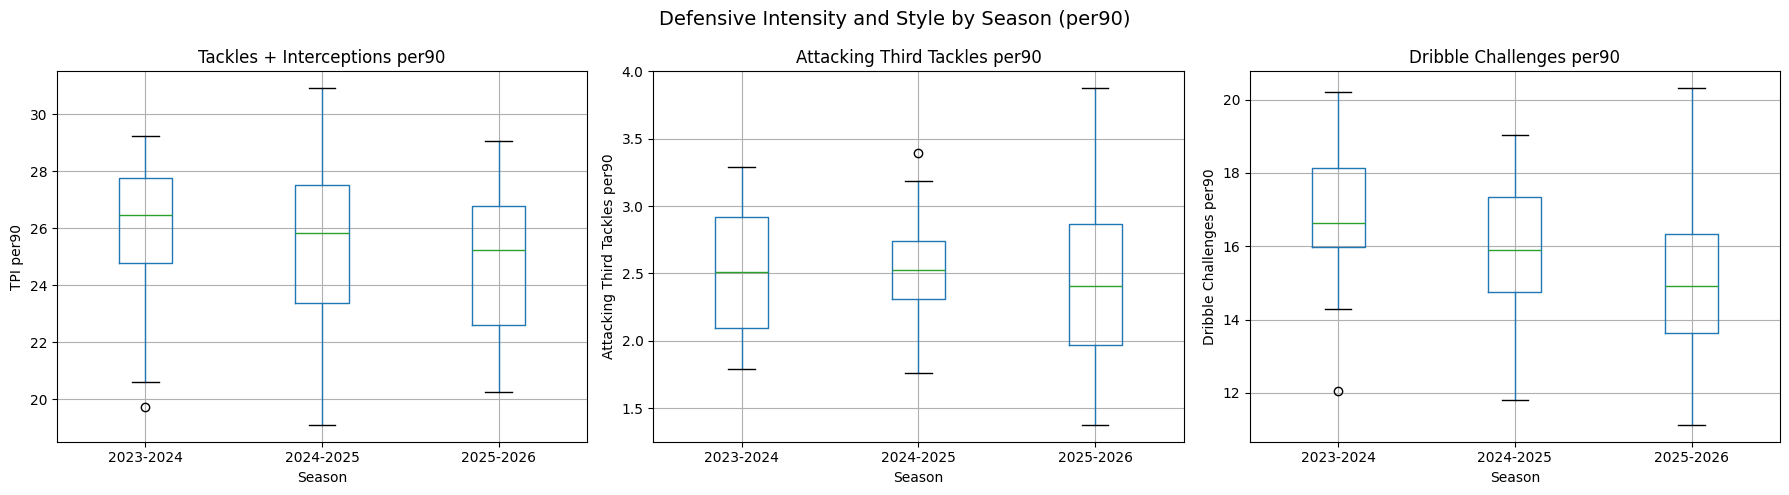

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Tackles + Interceptions per90
df_defense.boxplot(
    column="tpi_per90",
    by="season",
    ax=axes[0]
)
axes[0].set_title("Tackles + Interceptions per90")
axes[0].set_xlabel("Season")
axes[0].set_ylabel("TPI per90")

# 2. Tackles in Attacking Third per90
df_defense.boxplot(
    column="tackles_attacking_third_per90",
    by="season",
    ax=axes[1]
)
axes[1].set_title("Attacking Third Tackles per90")
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Attacking Third Tackles per90")

# 3. Dribble Challenges per90
df_defense.boxplot(
    column="dribble_challenges_per90",
    by="season",
    ax=axes[2]
)
axes[2].set_title("Dribble Challenges per90")
axes[2].set_xlabel("Season")
axes[2].set_ylabel("Dribble Challenges per90")

plt.suptitle("Defensive Intensity and Style by Season (per90)", fontsize=14)
plt.tight_layout()
plt.show()

### **Tackles + Interceptions per90**

* **Box plot:** The median of *tackles_plus_interceptions_per90* remains relatively high but shows a slight downward trend across seasons, suggesting that overall defensive intensity is broadly stable yet gradually softening over time.
* **IQR:** The IQR is moderate and tends to widen in later seasons, indicating increasing separation between teams in defensive intensity—coexisting both highly proactive defensive teams and more passive ones.


### **Tackles in Attacking Third per90**

* **Box plot:** The median of *tackles_attacking_third_per90* varies within a narrow band, implying that high pressing is not uniformly adopted across the league and is instead applied consistently by only a subset of teams.
* **IQR:** The IQR fluctuates across seasons—narrowing at some points and then widening again—reflecting clear differences in pressing style, with certain teams sustaining markedly higher high-press intensity than the rest.


### **Dribble Challenges per90**

* **Box plot:** The median of *dribble_challenges_per90* trends downward, indicating that the typical frequency of 1v1 dribble-challenge situations faced by teams is decreasing. This suggests improved spatial control and a greater ability to limit opponents’ dribbling opportunities.
* **IQR:** The IQR is relatively large and tends to increase, pointing to growing between-team differences in how often they are forced into 1v1 situations. This reflects diversity in opponents’ attacking styles as well as variation in each team’s defensive organization.


# Analysis by team (aggregated across multiple seasons)


In [ ]:
team_summary = (
    df_defense
    .groupby("team")
    .agg(
        tpi_median=("tpi_per90", "median"),
        tpi_q1=("tpi_per90", lambda x: x.quantile(0.25)),
        tpi_q3=("tpi_per90", lambda x: x.quantile(0.75)),

        att_third_median=("tackles_attacking_third_per90", "median"),
        att_third_q1=("tackles_attacking_third_per90", lambda x: x.quantile(0.25)),
        att_third_q3=("tackles_attacking_third_per90", lambda x: x.quantile(0.75)),

        dribble_median=("dribble_challenges_per90", "median"),
        dribble_q1=("dribble_challenges_per90", lambda x: x.quantile(0.25)),
        dribble_q3=("dribble_challenges_per90", lambda x: x.quantile(0.75)),
    )
)

#Calculate IQR
team_summary["tpi_iqr"] = team_summary["tpi_q3"] - team_summary["tpi_q1"]
team_summary["att_third_iqr"] = team_summary["att_third_q3"] - team_summary["att_third_q1"]
team_summary["dribble_iqr"] = team_summary["dribble_q3"] - team_summary["dribble_q1"]

team_summary


,tpi_median,tpi_q1,tpi_q3,att_third_median,att_third_q1,att_third_q3,dribble_median,dribble_q1,dribble_q3,tpi_iqr,att_third_iqr,dribble_iqr
team,,,,,,,,,,,,
Arsenal,22.500000,22.078947,23.118421,2.875000,2.845395,3.134868,13.552632,12.870066,13.921053,1.039474,0.289474,1.050987
Aston Villa,21.875000,21.240132,22.476974,1.789474,1.738487,2.144737,14.473684,14.421053,14.861842,1.236842,0.406250,0.440789
Bournemouth,27.421053,26.877193,27.526316,2.921053,2.802632,2.927193,16.600000,16.550000,17.352632,0.649123,0.124561,0.802632
Brentford,24.562500,24.360197,26.162829,2.562500,2.307566,2.873355,15.684211,14.685855,17.013158,1.802632,0.565789,2.327303
Brighton,26.842105,25.684211,26.858553,3.184211,2.907895,3.435855,18.500000,17.907895,19.406250,1.174342,0.527961,1.498355
Burnley,25.046053,24.194079,25.898026,2.026316,2.013158,2.039474,14.715461,14.388980,15.041941,1.703947,0.026316,0.652961
Chelsea,25.289474,23.960526,25.488487,2.657895,2.516447,2.684211,14.105263,13.802632,15.342105,1.527961,0.167763,1.539474
Crystal Palace,29.062500,29.018092,29.149671,2.447368,2.348684,2.723684,16.250000,16.138158,16.585526,0.131579,0.375000,0.447368
Everton,28.342105,26.327303,28.657895,2.562500,2.557566,2.741776,17.263158,16.037829,17.855263,2.330592,0.184211,1.817434


## Group of **strong defensive teams**

**Quantitative characteristics**

* High `tpi_median` → strong overall defensive intensity
* Low `dribble_median` → effective at limiting 1v1 situations
* Relatively small IQR → stable defensive profile across seasons

**Representative teams**

* **Manchester City**
* **Arsenal**
* **Crystal Palace**
* **Bournemouth**
* **Wolves**

**Interpretation**
This group defends effectively through **excellent spatial control and strong team structure**, without necessarily being forced into many 1v1 duels. Some teams, such as Manchester City and Arsenal, may show a `tpi_median` that is not exceptionally high, but paired with a very low `dribble_median`. This suggests they defend efficiently via possession control and positioning rather than relying purely on direct challenges.


## Group of **balanced teams**

**Quantitative characteristics**

* `tpi_median` at a **medium-to-high** level
* `att_third_median` and `dribble_median` not excessively high
* Moderate IQR → tactical adjustments across seasons, but not extreme

**Representative teams**

* **Chelsea**
* **Tottenham**
* **Aston Villa**
* **Fulham**
* **Brentford**
* **Newcastle Utd**

**Interpretation**
Teams in this group maintain a balanced approach between defense and attack. They press at a moderate level and are not overly exposed in 1v1 situations. Their defensive style is flexible, adapting to opponents and varying across seasons without major extremes.


## Group of **attack-leaning teams**

**Quantitative characteristics**

* High `att_third_median` → clear high-pressing approach
* High `dribble_median` → frequently drawn into 1v1 situations
* Large `tpi_iqr` and `dribble_iqr` → higher tactical volatility and defensive risk

**Representative teams**

* **Liverpool**
* **Manchester Utd**
* **Brighton**
* **Leicester City**

**Interpretation**
This group prioritizes attacking play and proactive pressing, which often forces their defense to handle frequent individual duels. This is reflected by a high `dribble_median` and large IQR values, indicating greater defensive risk and considerable variation in defensive structure across seasons.


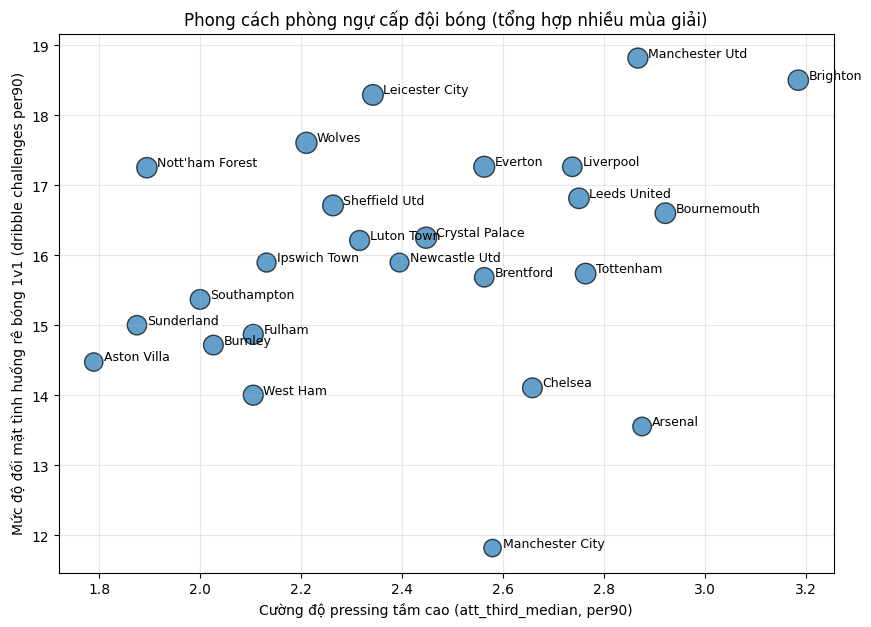

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(
    team_summary["att_third_median"],
    team_summary["dribble_median"],
    s=team_summary["tpi_median"] * 8,
    alpha=0.7,
    edgecolors="black"
)

for team, row in team_summary.iterrows():
    plt.text(
        row["att_third_median"] + 0.02,
        row["dribble_median"] + 0.02,
        team,
        fontsize=9
    )

plt.xlabel("High-pressing intensity (att_third_median, per90)")
plt.ylabel("Exposure to 1v1 dribbling situations (dribble challenges per90)")
plt.title("Team-level defensive styles (aggregated across multiple seasons)")

plt.grid(alpha=0.3)
plt.show()

### Team-level defensive styles (aggregated across multiple seasons)

**How to read the chart**
- **X-axis:** High-pressing intensity (att_third_median, per90)  
- **Y-axis:** Exposure to 1v1 dribbling situations (dribble_median, per90)  
- **Point size:** Overall defensive intensity (tpi_median)

---

### Key takeaways

**1) Clear separation in defensive identity**
- The scatter distribution shows that teams **do not converge to a single defensive model**.  
- Instead, they occupy different regions of the plane, reflecting **distinct strategic choices** in how they defend.

**2) High press + high 1v1 exposure (upper-right)**
- Teams in this zone (e.g., **Manchester United**, **Brighton**) tend to:
  - apply **aggressive high pressure**, and
  - accept **more frequent 1v1 duels** as a trade-off.
- This typically corresponds to a **proactive, attack-leaning style**, where the defensive line pushes up and risk increases.

**3) Control-based defending (lower-left)**
- Teams in the lower-left (notably **Manchester City**) suggest a different profile:
  - **lower high-press intensity**, and
  - **fewer 1v1 dribble contests**.
- Defensive strength comes from **possession control, spacing discipline, and positional structure**, rather than constant dueling.

**4) Balanced profiles (central cluster)**
- The central region (e.g., **Liverpool**, **Tottenham**, **Everton**) reflects teams that:
  - keep pressing intensity and 1v1 exposure **around mid-range**, and
  - can **adjust** based on opponent strength and match context.

**5) Pressing but controlled 1v1 risk (right-lower area)**
- Some teams (e.g., **Arsenal**) appear:
  - **farther to the right** (more high pressing),
  - yet **lower on the y-axis** (fewer 1v1 situations faced).
- This indicates **high pressing with strong defensive organization**, limiting direct 1v1 exposure even in a proactive setup.

---

### Overall interpretation
- The plot reinforces that there is **no single optimal defensive approach** in the league.
- Teams succeed through different defensive philosophies:
  - **control-based defending**,
  - **balanced pressing + structure**, or
  - **high-intensity pressing** with higher risk.
- Ultimately, defensive style is tightly linked to a team’s **overall playing identity**, tactical preferences, and ability to **manage space**.
